<a href="https://colab.research.google.com/github/aguusandy/pdi-2024/blob/master/Unidad1_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unidad 1 Práctica


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import de librerias
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
from google.colab.patches import cv2_imshow   # eso este porque tiraba error el cv.imshow()

In [ ]:
print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] / OpenCV version 4.8.0 


## Ejercicio 1:
Lectura, visualizacion y escritura de imagenes.
1. Realice la carga y visualizacion de diferentes imagenes.


In [ ]:
# EJERCICIO 1

url_img = "flores02.jpg"

img_gray = cv.imread(url_img, cv.IMREAD_GRAYSCALE)  # escala grises
img_color = cv.imread(url_img)                      # color

img_color_resize = cv.resize(img_color, (300, 300))
img_gray_resize = cv.resize(img_gray, (300, 300))

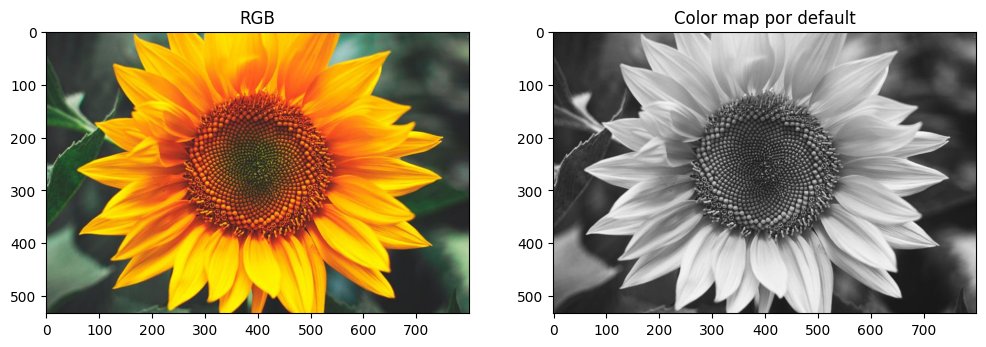

In [ ]:
# cv2_imshow(img_color_resize)
# cv2_imshow(img_gray_resize)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

ax[0].imshow(img_color[:,:,::-1]) # invierte los canales, ::-1 indica que se recorre desde el ultimo elemento al primero
ax[0].set_title("RGB")

# Si es de un solo canal, y no se especifica nada mas, se dibuja una imagen con un mapa de color por defecto, asignando a cada nivel de gris un color RGB
ax[1].imshow(img_gray,cmap="gray")
ax[1].set_title("Color map por default")

plt.show()

2. Muestre en pantalla informacion sobre las imagenes.


In [ ]:
print("Dimensiones de la imagen:", img_color.shape)
print("Tipo de dato de la imagen: ", img_color.dtype)

Dimensiones de la imagen: (533, 800, 3)
Tipo de dato de la imagen:  uint8


3. Investigue los formatos la imagen y como leer y como escribir un valor puntual de la imagen.


In [ ]:
# Los tipos de imagen se dividen en 2 grupos: rasterizados(pixeles) y vectorizados(vectores)
# De los formatos rasterizados se destacan:
#   1. JPEG y JPG
#   2. PNG
#   3. BMP
#   4. GIF
#   5. TIFF
#   6. HEIF
#   7. RAW
#   8. PSD

# Para formato vectoriales:
#   1. SVG
#   2. EPS
#   3. PDF
#   4. INDD
#   5. AI

# Para leer y escribir en un pixel (x,y) se puede utilizar:
#   valor px = imagen[y,x]
#   imagen[y,x] = valor px

print("valor del pixel [50,50] en la imagen: ",img_gray_resize[50,50])


valor del pixel [50,50] en la imagen:  158


4. Utilice el pasaje por parametros para especificar la imagen a cargar.


5. Defina y recorte una subimagen de una imagen (vea ROI, Region Of Interest).


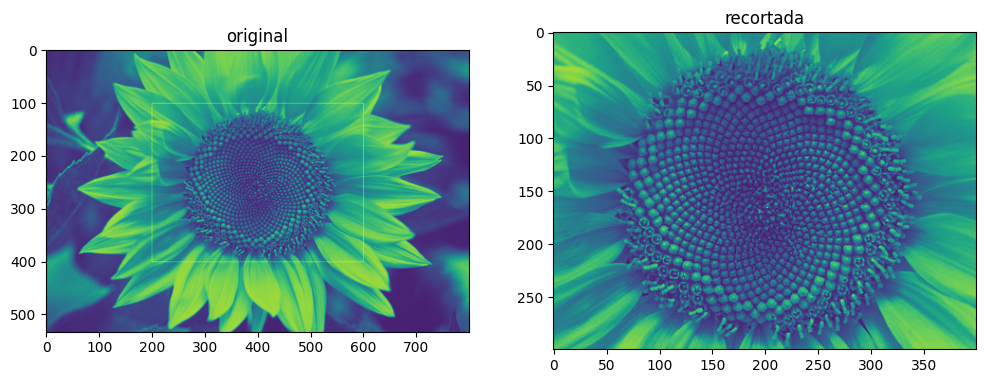

In [ ]:
# imagen2 = imagen[x0:x1,y0:y1].copy()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,12))

img_recortada_gray = img_gray[100:400,200:600].copy()   # le paso img[y0:y1,x9:x1] -> copia la imagen en [y,x]

ax[0].imshow(img_gray)
ax[0].set_title("original")

ax[1].imshow(img_recortada_gray)
ax[1].set_title("recortada")

plt.show()

6. Investigue y realice una funcion que le permita mostrar varias imagenes en una sola ventana.


In [ ]:
# le paso un vector de imagenes ya cargadas
def imprimir_imagenes(img_v):
  size_v = len(img_v)

  fig, ax = plt.subplots(nrows=size_v, ncols=1, figsize=(10,10))
  for idx,img in enumerate(img_v):
    ax[idx].imshow(img)
  plt.show()


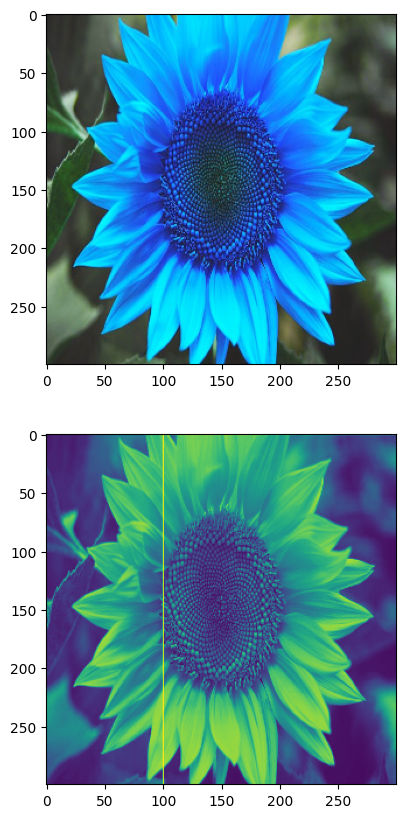

In [ ]:
img_v1 = [img_color_resize,img_gray_resize]
imprimir_imagenes(img_v1)

7. Dibuje sobre la imagen lıneas, cırculos y rectangulos (opcional: defina la posicion en base al click del mouse).

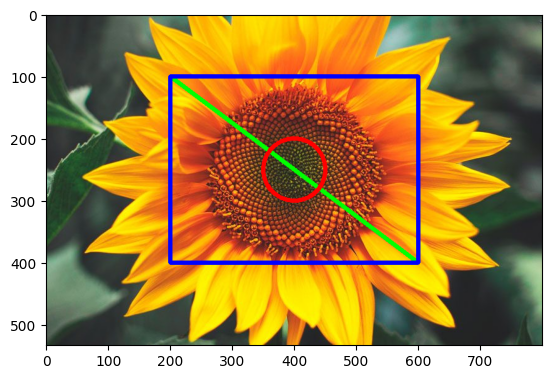

In [ ]:
img_rgb = img_color[:,:,::-1]

# lineas -> cv2.line(imagen, start point, end point, color, thickness, line type)
cv.line(img_color, (200,100), (600,400), color=(0, 255, 0) , thickness=5)

# circulo -> cv2.circle(imagen, center point, radius, color, thickness, line type)
cv.circle(img_color, (400,250), 50, color=(0,0,255),thickness=5)

# rectangulo -> cv2.rectangle(imagen, start point, end point, color, thickness)
cv.rectangle(img_color, (200,100), (600,400), color=(255, 0, 0) , thickness=5)

plt.imshow(img_rgb)


##Ejercicio 2: Informacion de intensidad.
1. Informe los valores de intensidad de puntos particulares de la imagen (opcional: determine la posicion en base al click del mouse).
2. Obtenga y grafique los valores de intensidad (perfil de intensidad) sobre una determinada fila o columna.
3. Grafique el perfil de intensidad para un segmento de interes cualquiera.

## Ejercicio 3: Aplicacion
Utilice las herramientas aprendidas en esta unidad para implementar un sistema que permita identificar una botella que no esta correctamente llena. Las imagenes que se proporcionaran son capturadas con una camara fija, en escala de grises y directamente de la lınea de envasado. Para implementar el sistema debera bastarle una imagen de ejemplo “botella.tif” (que encontrara en el repositorio). Adicionalmente, se espera que el sistema pueda:

*   identificar una botella no-llena en cualquier posicion de la imagen.
*   indicar la posicion de la botella en la imagen (podrıa ser con un recuadro, informando la posicion relativa entre botellas, la posicion absoluta en pixels, etc).
*   informar el porcentaje de llenado de la botella no-llena.